In [142]:
%matplotlib inline


# Plot randomly generated classification dataset

This example plots several randomly generated classification datasets.
For easy visualization, all datasets have 2 features, plotted on the x and y
axis. The color of each point represents its class label.

The first 4 plots use the :func:`~sklearn.datasets.make_classification` with
different numbers of informative features, clusters per class and classes.
The final 2 plots use :func:`~sklearn.datasets.make_blobs` and
:func:`~sklearn.datasets.make_gaussian_quantiles`.


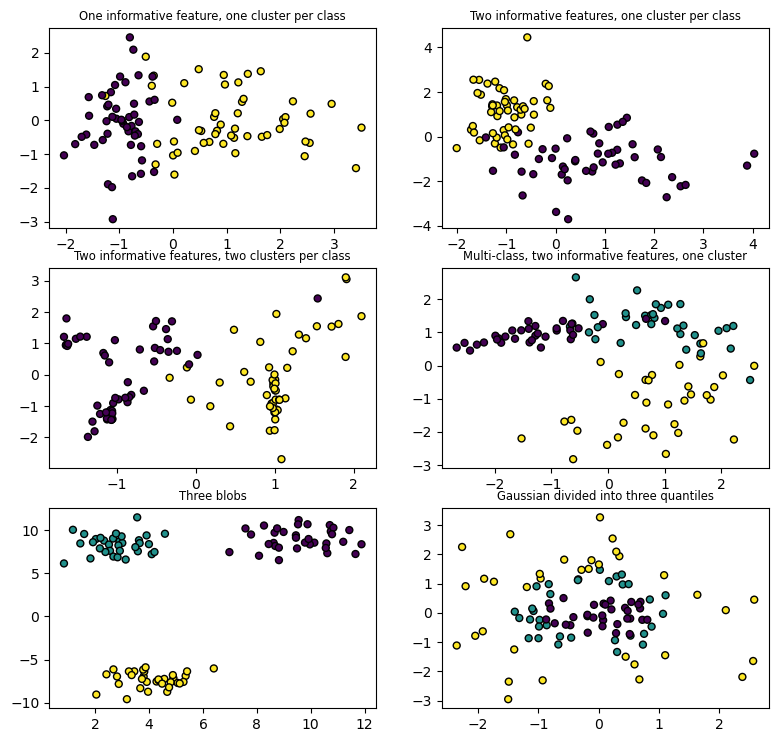

In [143]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)

plt.subplot(321)
plt.title("One informative feature, one cluster per class", fontsize="small")
X1, Y1 = make_classification(
    n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1
)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

plt.subplot(322)
plt.title("Two informative features, one cluster per class", fontsize="small")
X1, Y1 = make_classification(
    n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1
)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

plt.subplot(323)
plt.title("Two informative features, two clusters per class", fontsize="small")
X2, Y2 = make_classification(n_features=2, n_redundant=0, n_informative=2)
plt.scatter(X2[:, 0], X2[:, 1], marker="o", c=Y2, s=25, edgecolor="k")

plt.subplot(324)
plt.title("Multi-class, two informative features, one cluster", fontsize="small")
X1, Y1 = make_classification(
    n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=3
)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

plt.subplot(325)
plt.title("Three blobs", fontsize="small")
X1, Y1 = make_blobs(n_features=2, centers=3)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

plt.subplot(326)
plt.title("Gaussian divided into three quantiles", fontsize="small")
X1, Y1 = make_gaussian_quantiles(n_features=2, n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

plt.show()

In [144]:
# Import OneClassSVM
from sklearn.svm import OneClassSVM
import numpy as np

from plotly.subplots import make_subplots
import plotly.graph_objects as go

X1, Y1 = make_classification(
    n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=3
)

labels = np.unique(Y1)

# Fit OCSVM
masks = []

svm = OneClassSVM().fit(X1[Y1 == 0])
preds1 = svm.predict(X1)
colors = np.array(["red", "green"])
colors0 = colors[(preds1 + 1) // 2]
masks.append(preds1 == -1)

svm = OneClassSVM().fit(X1[Y1 == 1])
preds = svm.predict(X1)
colors1 = colors[(preds + 1) // 2]
masks.append(preds == -1)

svm = OneClassSVM().fit(X1[Y1 == 2])
preds = svm.predict(X1)
colors2 = colors[(preds + 1) // 2]
masks.append(preds == -1)

novel = np.all(masks, axis=0)
novel_colors = np.array(["white","purple"]) 
novel_colors = novel_colors[(novel + 1) // 2]

In [145]:
XGreen = X1[preds1 == 1]
XRed = X1[preds1 == -1]
XGreen

array([[ 1.99862887, -0.52264101],
       [ 0.43128219, -1.12803511],
       [ 1.86148841, -0.92465765],
       [ 0.72918868, -1.14938388],
       [ 1.46971984, -0.53008941],
       [-0.1013376 , -1.74277997],
       [ 1.81493295, -0.55039434],
       [ 1.62016297, -0.69234612],
       [-0.73043843, -1.57473707],
       [ 1.33819633, -0.66736392],
       [-0.26258157, -1.3738312 ],
       [-0.0943698 , -1.52218441],
       [-0.28309119, -2.06695552],
       [ 1.12313732, -1.0549965 ],
       [ 1.93659493, -0.69893343],
       [ 1.20406656, -1.04690381],
       [ 0.01237122, -1.26989202],
       [ 0.97196212, -1.28236721],
       [ 2.00008601, -0.75244461],
       [-0.07928504, -1.60251965]])

In [148]:
# Create subplots
fig = make_subplots(
    rows=2, cols=6,
    specs=[
    [{"colspan": 2}, None, {"colspan": 2}, None, {"colspan": 2}, None],
    [{"colspan": 3}, None, None, {"colspan": 3}, None, None]
    ]
    
)

size = 8

XGreen = X1[preds1 == 1]
XRed = X1[preds1 == -1]


fig.add_trace(
    go.Scatter(
        x=XRed[:, 0],
        y=XRed[:, 1],
        name="Outlier",
        mode="markers",
        marker=dict(
            color="red",
            size=size,
            line=dict(
                color="DarkSlateGrey",
                width=1
            ),
        )
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=XGreen[:, 0],
        y=XGreen[:, 1],
        name="Inlier",
        mode="markers",
        marker=dict(
            color="green",
            size=size,
            line=dict(
                color="DarkSlateGrey",
                width=1
            ),

        )
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=X1[:, 0],
        y=X1[:, 1],
        mode="markers",
        marker=dict(
            color=colors1,
            size=size,
            line=dict(
                color="DarkSlateGrey",
                width=1
            )
        ),
        showlegend=False,
        name="Novelty"
    ),
    row=1, col=3,
)

fig.add_trace(
    go.Scatter(
        showlegend=False,
        x=X1[:, 0],
        y=X1[:, 1],
        mode="markers",
        marker=dict(
            color=colors2,
            size=size,
            line=dict(
                color="DarkSlateGrey",
                width=1
            )
        ),
    ),
    row=1, col=5
)

XNovel = X1[novel == 1]
XInlier = X1[novel == 0]

fig.add_trace(
    go.Scatter(
        x=XInlier[:, 0],
        y=XInlier[:, 1],
        mode="markers",
        marker=dict(
            color="green",
            opacity=0.3,
            size=size,
            line=dict(
                color="DarkSlateGrey",
                width=1,
            )
        ),
        name="Classified as Inlier"
    ),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(
        x=XNovel[:, 0],
        y=XNovel[:, 1],
        mode="markers",
        name="Novelty",
        marker=dict(
            color="orange",
            size=size,
            line=dict(
                color="DarkSlateGrey",
                width=1
            )
        )
    ),
    row=2, col=1
)



# Legend: horizontal along the bottom
fig.update_layout(
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1 
    )   
)



# Set axis equal
fig.update_xaxes(scaleanchor="y", scaleratio=1)
fig.update_yaxes(scaleanchor="x", scaleratio=1)


fig.show()
# fig.write_image("Example_SVM.png", width=1000, height=1000, scale=4)

In [149]:
# Import AffinityPropagation
from sklearn.cluster import AffinityPropagation
import numpy as np
import plotly.express as px

# Fit AffinityPropagation to Novel data
af = AffinityPropagation().fit(XNovel)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

# colors = [{"color": "red"}, {"color": "green"}, {"color": "blue"}, {"color": "orange"}, {"color": "purple"}, {"color": "yellow"}, {"color": "black"}, {"color": "pink"}, {"color": "brown"}, {"color": "grey"}]
# # fig = go.Figure()
# Assign colors to pastel colors
palette = px.colors.qualitative.Pastel
colors = [{"color": palette[i]} for i in range(n_clusters_)]


for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k     
    cluster_center = XNovel[cluster_centers_indices[k]]
    # plt.scatter(
    #     XNovel[class_members, 0], XNovel[class_members, 1], color=col["color"], marker="."
    # )
    fig.add_trace(
        go.Scatter(
            x=XNovel[class_members, 0],
            y=XNovel[class_members, 1],
            mode="markers",
            marker=dict(
                color=col["color"],
                size=size,
                line=dict(
                    color="DarkSlateGrey",
                    width=1
                )
            ),
            showlegend=False
    ), row=2, col=4)

    # plt.scatter(
    #     cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
    # )
    fig.add_trace(
        go.Scatter(
            x=[cluster_center[0]],
            y=[cluster_center[1]],
            mode="markers",
            marker=dict(
                color=col["color"],
                size=14,
                line=dict(
                    color="DarkSlateGrey",
                    width=1
                )
            ),
            showlegend=False
    ), row=2, col=4)

    for x in XNovel[class_members]:
        # plt.plot(
        #     [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
        # )
        fig.add_trace(
            go.Scatter(
                x=[cluster_center[0], x[0]],
                y=[cluster_center[1], x[1]],
                mode="lines",
                line=dict(
                    color=col["color"],
                    width=1
                ),
                showlegend=False
        ), row=2, col=4)

# # Set axis equal
# fig.update_xaxes(scaleanchor="y", scaleratio=1)
# fig.update_yaxes(scaleanchor="x", scaleratio=1)
# Increase font size
fig.update_layout(font_size=15)

# Remove axis ticks
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)

fig.write_image("Stage2.png", width=1000, height=700, scale=4)
fig.show()